## GSE 522 Assignment: Practice with Macro Data
### David Ngo

Do an analysis of the United States' business cycle that is analogous to the one we discussed in the lecture on 21 January 2021.  Include two new variables: the unemployment rate  (UNRATE) and real consumer durables , using the nominal series (PCDG)  and its chained price index (DDURRG3Q086SBEA). 

You will need to change the monthly unemployment data into a quarterly series, and you will need to compute a real consumer durables series. Make a well formatted table like that on p. 12 of Prescott's article, but include four leads and four lags for each variable. Make graphs like those I created in my lecture. 

Write one paragraph about what you have learned about the business cycle from your work. 

In [1]:
%%capture
# suppresses messages

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install fredapi

from fredapi import Fred
fred = Fred(api_key='6c0ecd6565503b64631fd2b36f71293a')
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Figure size
plt.rcParams['figure.figsize'] = (10,6) 

# GDP
# Imported from Fred, got these names from there (what we have to do for assignment)
GDP = fred.get_series('GDPC1') # Real Y
C = fred.get_series('PCECC96') # Real C
I = fred.get_series('GPDIC1') # Real I
G = fred.get_series('GCEC1') # Real G
Net_X = fred.get_series('NETEXP') #nominal net exports, starts in 1946
Nom_GDP= fred.get_series('GDP') #nominal GDP, starts in 1946
Exports=Net_X/Nom_GDP # net exports as a share of GDP

In [2]:
GDP

1947-01-01     2033.061
1947-04-01     2027.639
1947-07-01     2023.452
1947-10-01     2055.103
1948-01-01     2086.017
                ...    
2020-01-01    19010.848
2020-04-01    17302.511
2020-07-01    18596.521
2020-10-01    18794.426
2021-01-01    19086.375
Length: 297, dtype: float64

Include two new variables: the unemployment rate  (UNRATE) and real consumer durables , using the nominal series (PCDG)  and its chained price index (DDURRG3Q086SBEA). You will need to change the monthly unemployment data into a quarterly series, and you will need to compute a real consumer durables series.

In [26]:
Umonth = fred.get_series('UNRATE') #monthly not quarterly, will need to transform.  These data start in Jan 1948
UNRATE = Umonth.resample('Q').first()
Nom_Con = fred.get_series('PCDG') #  nominal series; personal Consumption Expenditures: Durable Goods % empty values until 1947-01-01
Ind_Con = fred.get_series('DDURRG3Q086SBEA') # price index for nominal consumer durables; personal consumption expenditures: Durable goods (chain-type price index)
Real_Con = Nom_Con / Ind_Con # Real Consumer Durables

In [27]:
Umonth.resample('Q').first()

1948-03-31     3.4
1948-06-30     3.9
1948-09-30     3.6
1948-12-31     3.7
1949-03-31     4.3
              ... 
2020-06-30    14.8
2020-09-30    10.2
2020-12-31     6.9
2021-03-31     6.3
2021-06-30     6.1
Freq: Q-DEC, Length: 294, dtype: float64

From lecture, we created the following graphs:

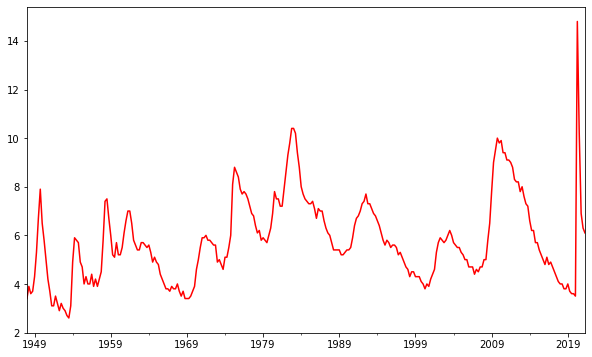

In [28]:
# picture of the quarterly unemployment rate.
plt.rcParams['figure.figsize'] = (10,6)
UNRATE.plot(color='red')
plt.show()

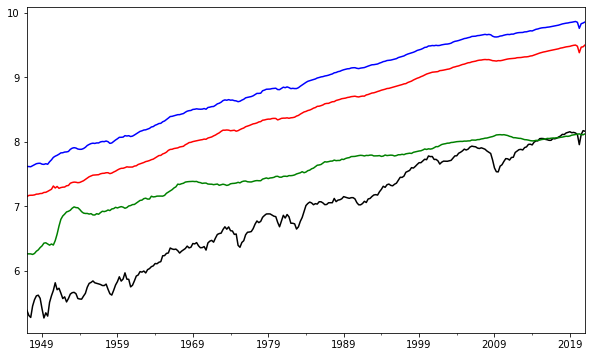

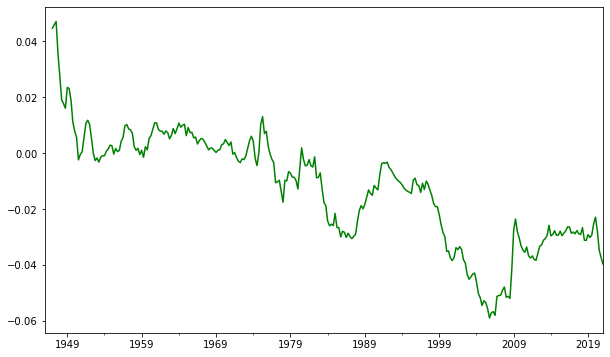

In [29]:
# color of plot lines, was in billions but now plotting in log
np.log(GDP).plot(color='blue')
np.log(C).plot(color='red')
np.log(I).plot(color='black')
np.log(G).plot(color='green')
plt.show()
Exports.plot(color='green')
plt.show()

Now let us graph the unemployment rate and real consumer durables. Unemployment rate is identified as the orange line; real consumer durables is purple.

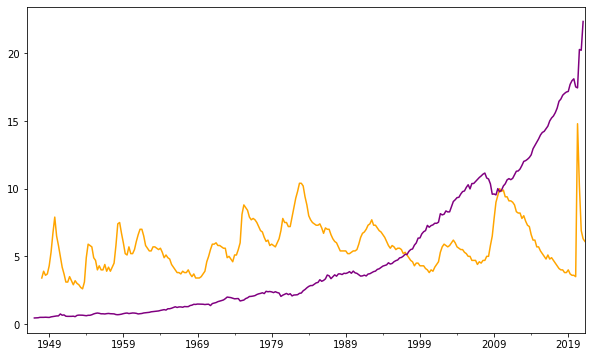

In [30]:
(UNRATE).plot(color='orange')
(Real_Con).plot(color='purple')
plt.show()

We can also plot the log of the unemployment rate and real consumer durables.

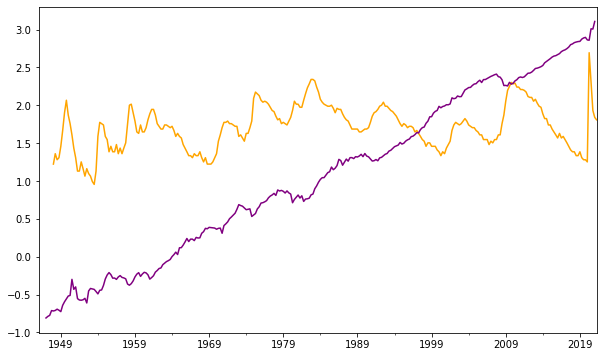

In [31]:
np.log(UNRATE).plot(color='orange')
np.log(Real_Con).plot(color='purple')
plt.show()

Let  us take the exponential curve and make the cycles and trends of each variable more linear

In [32]:
# Now we filter the series
# The different indices show that the series must be matched proper

# Running the data through the Prescott filter

Y_cycle, Y_trend = sm.tsa.filters.hpfilter(np.log(GDP)[4:], 1600)
C_cycle, C_trend = sm.tsa.filters.hpfilter(np.log(C)[4:], 1600)
I_cycle, I_trend = sm.tsa.filters.hpfilter(np.log(I)[4:], 1600)
G_cycle, G_trend = sm.tsa.filters.hpfilter(np.log(G)[4:], 1600)
X_cycle, X_trend = sm.tsa.filters.hpfilter(Exports[8:], 1600)
UNRATE_cycle, UNRATE_trend = sm.tsa.filters.hpfilter(UNRATE, 1600)
Real_Con_cycle, Real_Con_trend = sm.tsa.filters.hpfilter(np.log(Real_Con)[8:], 1600) # durables cycle, durables trend 

In [33]:
UNRATE_cycle

1948-03-31   -1.242359
1948-06-30   -0.738652
1948-09-30   -1.034167
1948-12-31   -0.927669
1949-03-31   -0.317271
                ...   
2020-06-30    8.733478
2020-09-30    3.916415
2020-12-31    0.401166
2021-03-31   -0.412792
2021-06-30   -0.826234
Freq: Q-DEC, Name: cycle, Length: 294, dtype: float64

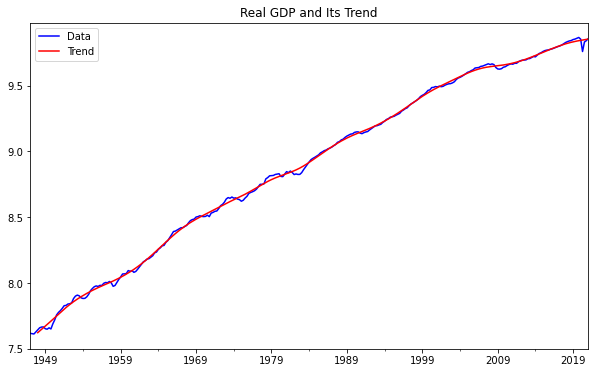

In [34]:
np.log(GDP).plot(color='blue')
Y_trend.plot(color='red')
plt.title('Real GDP and Its Trend')
plt.legend(['Data', 'Trend'])
plt.show()

We can also do the same for unemployment and real consumer durables.

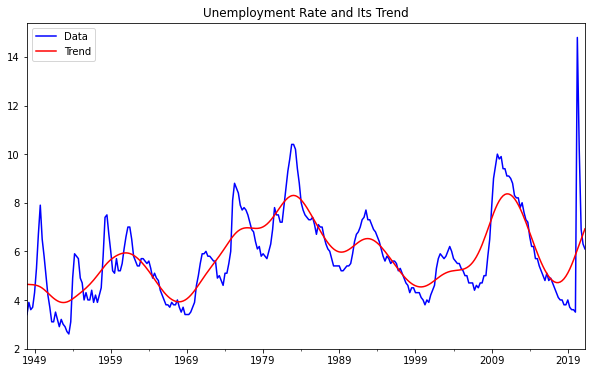

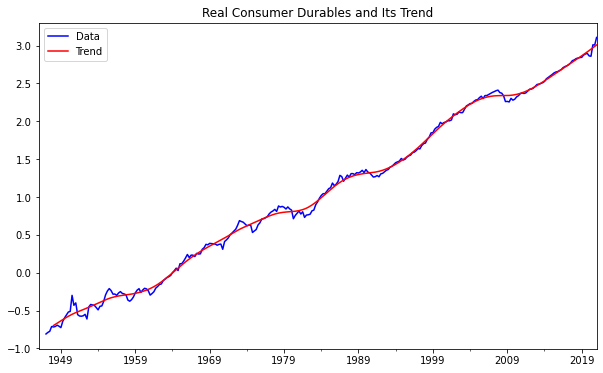

In [35]:
(UNRATE).plot(color='blue')
UNRATE_trend.plot(color='red')
plt.title('Unemployment Rate and Its Trend')
plt.legend(['Data', 'Trend'])
plt.show()

np.log(Real_Con).plot(color='blue')
Real_Con_trend.plot(color='red')
plt.title('Real Consumer Durables and Its Trend')
plt.legend(['Data', 'Trend'])
plt.show()

Below is the plot of all the different cycles, and the business cycle.

Next, we plot the autocorrelation of cycle Y and the cross correlations between cycle Y and other variables.

In [36]:
Y_cycle

1948-01-01    0.020398
1948-04-01    0.024427
1948-07-01    0.017784
1948-10-01    0.006505
1949-01-01   -0.019847
                ...   
2020-01-01    0.009273
2020-04-01   -0.087341
2020-07-01   -0.017658
2020-10-01   -0.009510
2021-01-01    0.003464
Name: cycle, Length: 293, dtype: float64

In [37]:
UNRATE_cycle

1948-03-31   -1.242359
1948-06-30   -0.738652
1948-09-30   -1.034167
1948-12-31   -0.927669
1949-03-31   -0.317271
                ...   
2020-06-30    8.733478
2020-09-30    3.916415
2020-12-31    0.401166
2021-03-31   -0.412792
2021-06-30   -0.826234
Freq: Q-DEC, Name: cycle, Length: 294, dtype: float64

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

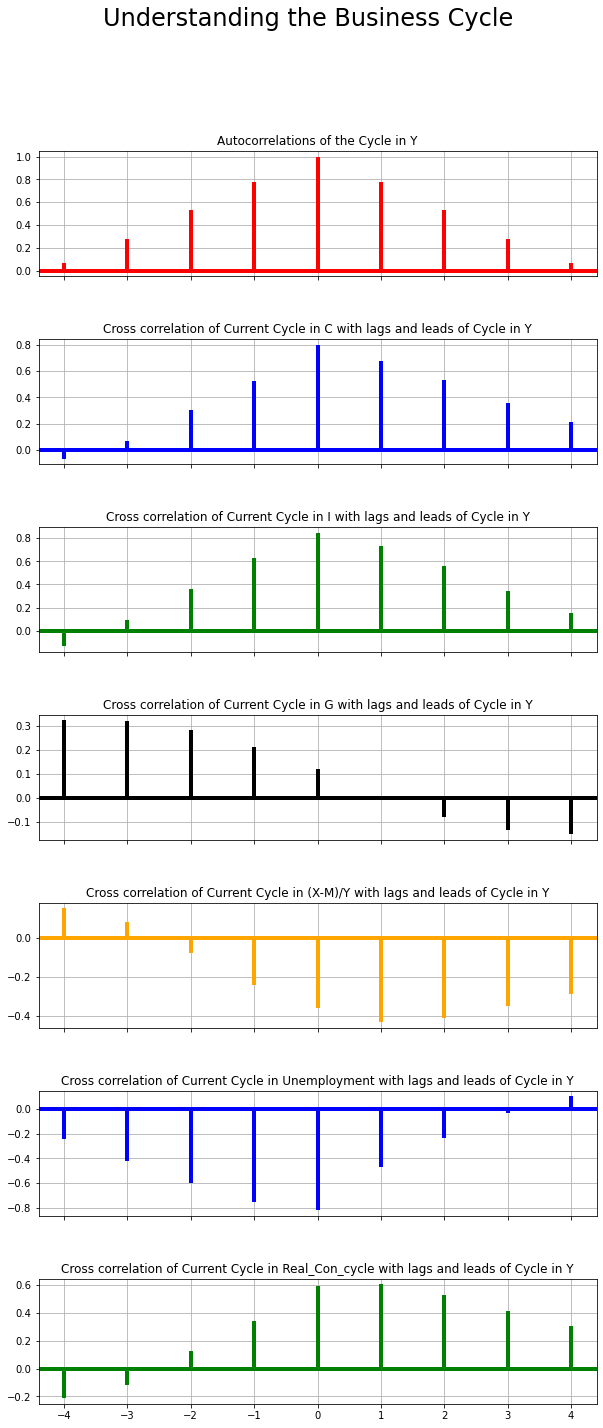

In [40]:
# Set figure size
plt.rcParams["figure.figsize"] = [10,20]

# Creating 7 axes and subplots
fig, [ax1, ax2, ax3, ax4, ax5, ax6, ax7] = plt.subplots(7, 1, sharex=True)

# Setting the title
fig.suptitle('Understanding the Business Cycle', fontsize=24)

# The Y cycle is 100% correlated with itself
ax1.acorr(Y_cycle, usevlines=True, normed=True, maxlags=4, lw=4, color = 'r')
ax1.set_title('Autocorrelations of the Cycle in Y')
ax1.grid(True)

# Consumption is highly correlated with business cycle; when there is a boom, consumption is high
ax2.set_title('Cross correlation of Current Cycle in C with lags and leads of Cycle in Y') # title
ax2.xcorr(Y_cycle, C_cycle, usevlines=True, maxlags=4, normed=True, lw=4, color = 'b') # first axes autocorrelations of Cycle in Y against itself
ax2.grid(True)

# Investment is highly correlated with business cycle; when there is a boom, investment is high
ax3.set_title('Cross correlation of Current Cycle in I with lags and leads of Cycle in Y')
ax3.xcorr(Y_cycle, I_cycle, usevlines=True, maxlags=4, normed=True, lw=4, color = 'g')
ax3.grid(True)

# How government spending is correlated with business cycle; government spending high after business cycle has boomed
ax4.set_title('Cross correlation of Current Cycle in G with lags and leads of Cycle in Y')
ax4.xcorr(Y_cycle, G_cycle, usevlines=True, maxlags=4, normed=True, lw=4, color = 'black')
ax4.grid(True)

# There is a negative correlation between business cycle and exports
ax5.set_title('Cross correlation of Current Cycle in (X-M)/Y with lags and leads of Cycle in Y')
ax5.xcorr(Y_cycle, X_cycle, usevlines=True, maxlags=4, normed=True, lw=4, color = 'orange')
ax5.grid(True)

# There is negative correlation between business cycle and UNRATE_cycle
# Effects of business cycle on UNRATE_cycle seem to lag behind by one quarter
ax6.set_title('Cross correlation of Current Cycle in Unemployment with lags and leads of Cycle in Y')
ax6.xcorr(Y_cycle, UNRATE_cycle[:293], usevlines=True, maxlags=4, normed=True, lw=4, color = 'b')
ax6.grid(True)

# There is positice correlation between business cycle and Real_Con_cycle
ax7.set_title('Cross correlation of Current Cycle in Real_Con_cycle with lags and leads of Cycle in Y')
ax7.xcorr(Y_cycle, Real_Con_cycle, usevlines=True, maxlags=4, normed=True, lw=4, color = 'g')
ax7.grid(True)

#Adjust space between subplots
plt.subplots_adjust(bottom=.01, wspace=.015, hspace=.5);

plt.show()

We can store the autocorrelation of Y and lagged crosscorrelations directly from the above figures.

In [41]:
#Now I need to get the standard deviations of the different cyclical components:

names = [Y_cycle, C_cycle, I_cycle, G_cycle, X_cycle, UNRATE_cycle, Real_Con_cycle]

stdev = [np.std(macrovar)for macrovar in names] #This is why Python is epic.  Look closely at this syntax!

In [42]:
# This block of code calculates the cross correlations, including the autocorrelation of Y with itself
# and its lags.  I couldn't find any code out there that I liked.
#The sample autocorrelations are not completely symmetric.  Is that a problem?

def cor(x,y,xlag):
    """
    This function computs cross correlations with leads and lags of x only
    I regret to say that I had to write this function to do the homework.
    It is essentially a bunch code that carefully trims the data.
    """
    m=len(x) 
    n=len(y)
    if not isinstance(xlag,int):  #check that we are using integers for lags or leads of x
        return('The lag length is not an integer.')
    if m != n: #check that the series match
        return('The series do not have the same length.')
    if xlag==0: #special case with no trimming
        x1 = x
        y1 = y
        # The next statement is the defintion of correlation
        return((np.dot((x1-np.mean(x1)),(y1-np.mean(y1))/(n-xlag))/(np.std(x1)*np.std(y1))))
    if xlag > 0:
        x1 = x[:-xlag] #trim off the end
        y1 = y[xlag:]  #trim off the beginning
        return((np.dot((x1-np.mean(x1)),(y1-np.mean(y1))/(n-xlag))/(np.std(x1)*np.std(y1))))
    if xlag < 0:
        x1 = x[-xlag:] #trim off the beginning
        y1 = y[:xlag]  #trim off the end
        return((np.dot((x1-np.mean(x1)),(y1-np.mean(y1))/(n-xlag))/(np.std(x1)*np.std(y1))))
    #check if my code is really out to lunch
    return('Nothing happened')

In [43]:
z = [4,3,2,1,0,-1,-2,-3,-4]  #Start with the lags, then do the leads!
y=[]
for xlags in z:
    y.append([cor(Y_cycle, macrovar, xlags)for macrovar in names]) #Isn't Python wonderful?

In [44]:
# This is how one sets up a dataframe

# First comes a dictionary
data = {'Standard deviation':  stdev, 'Y(-4)': y[0], 'Y(-3)': y[1], 'Y(-2)': y[2], 'Y(-1)': y[3], 'Y(0)': y[4],
        'Y(+1)': y[5], 'Y(+2)': y[6], 'Y(+3)': y[7], 'Y(+4)': y[8]}
        
# Now come the column names
df = pd.DataFrame (data, columns = ['Standard deviation','Y(-4)','Y(-3)','Y(-2)','Y(-1)','Y(0)','Y(+1)','Y(+2)','Y(+3)','Y(+4)'])
                                
# Change the row indexes to make them comprehensible
names = ['Y','C','I','G','(X-M)/Y', 'Unemployment rate', 'Consumer durables']
df.index = names
# Now put in a small touch to make the table look like that in Prescott on p.12
df.index.name = 'Macro Variable'
df

,Standard deviation,Y(-4),Y(-3),Y(-2),Y(-1),Y(0),Y(+1),Y(+2),Y(+3),Y(+4)
Macro Variable,,,,,,,,,,
Y,0.016724,0.0717135,0.280292,0.539318,0.777774,1,0.772483,0.532006,0.274611,0.0697818
C,0.013829,-0.0686756,0.0703095,0.302701,0.527777,0.800504,0.674553,0.527322,0.353605,0.233961
I,0.072274,-0.144851,0.0930082,0.365252,0.633693,0.84942,0.72923,0.554178,0.338425,0.147622
G,0.031335,0.341321,0.321855,0.283973,0.214114,0.119657,0.00569822,-0.0785148,-0.132069,-0.148568
(X-M)/Y,0.004106,0.159305,0.0823677,-0.0771559,-0.240138,-0.356587,-0.432278,-0.411729,-0.348905,-0.285778
Unemployment rate,1.012614,The series do not have the same length.,The series do not have the same length.,The series do not have the same length.,The series do not have the same length.,The series do not have the same length.,The series do not have the same length.,The series do not have the same length.,The series do not have the same length.,The series do not have the same length.
Consumer durables,0.047833,-0.223866,-0.118072,0.124451,0.339364,0.591623,0.60572,0.526447,0.411248,0.306192


We can now construct a table that contains the standard deviations and cross serial correlations of output and other aggregate time series for the American economy from 1947-2020.

For this assignment, we  examined fluctuations in the business cycle and its effects on other types of cycles. Business cycles are a recurrent fluctuation of output that forms a trend and the co-movements among other aggregate time series. In this instance, the cycle of Real GDP is the base in which we cross correlate with the cycles other time series. Cross-correlation values closer to 1 indicate that the business cycles are more synchronized together, near 0 indicates that there is not statistical relationship, and -1 indicates that the two series move perfectly in a counter-cyclical direction. The Hodrick-Prescott filter was used to to identify longer term fluctuations as part of the growth trend and short term fluctuations as part of cyclical movement, smoothing and improving the cyclical movement model for each variable. We find that, in the short term, fluctuations in these cycles can be accounted for by fluctuations in real GDP (that we had used as the base). For example, downturns the real GDP cycle results in real government consumption rising high in response, several cycles later. In another instance, we find that net exports have a negative cross correlation with Real GDP, and a cyclical downturn in GDP corresponds in ab increase in net exports a cycle later; less goods and services are imported (less demand) in response to the a downturn in GDP. Overall, we find that business cycles in the short run can be used to predict temporary shocks and movements of other variable's cycles (one or several quarters afterwards).

# Lessons about the business cycle

<ol>
    <li>The cycle in GDP is assumed to drive everything.</li>
    <li>The GDP cycle is persistent.  It takes about four quarters to die off. </li>  
    <li>Investment is the most volatile component of GDP. Consumer durables spending is the second most volatile.</li>  
    <li>Consumption and investment both have strong contemporaneous correlations with GDP. </li>  
    <li>Net exports and government spending are negatively contemporaneously correlated with GDP.</li>
    <li>Unemployment is low when the economy was booming last quarter; unemployment is a lagging indicator.</li>  
    <li>Spending on durable goods is high when the economy will be booming next quarter' durables purchases are a leading indicator. </li> 
    <li>The same fact is true for net exports; a surge in imports is correlated with a boom in GDP next quarter.</li>
    <li>Government spending is high when GDP was booming a year ago; it is a lagging indicator, with a long lag.</li>
</ol>